In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../DATA/mushrooms.csv")

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


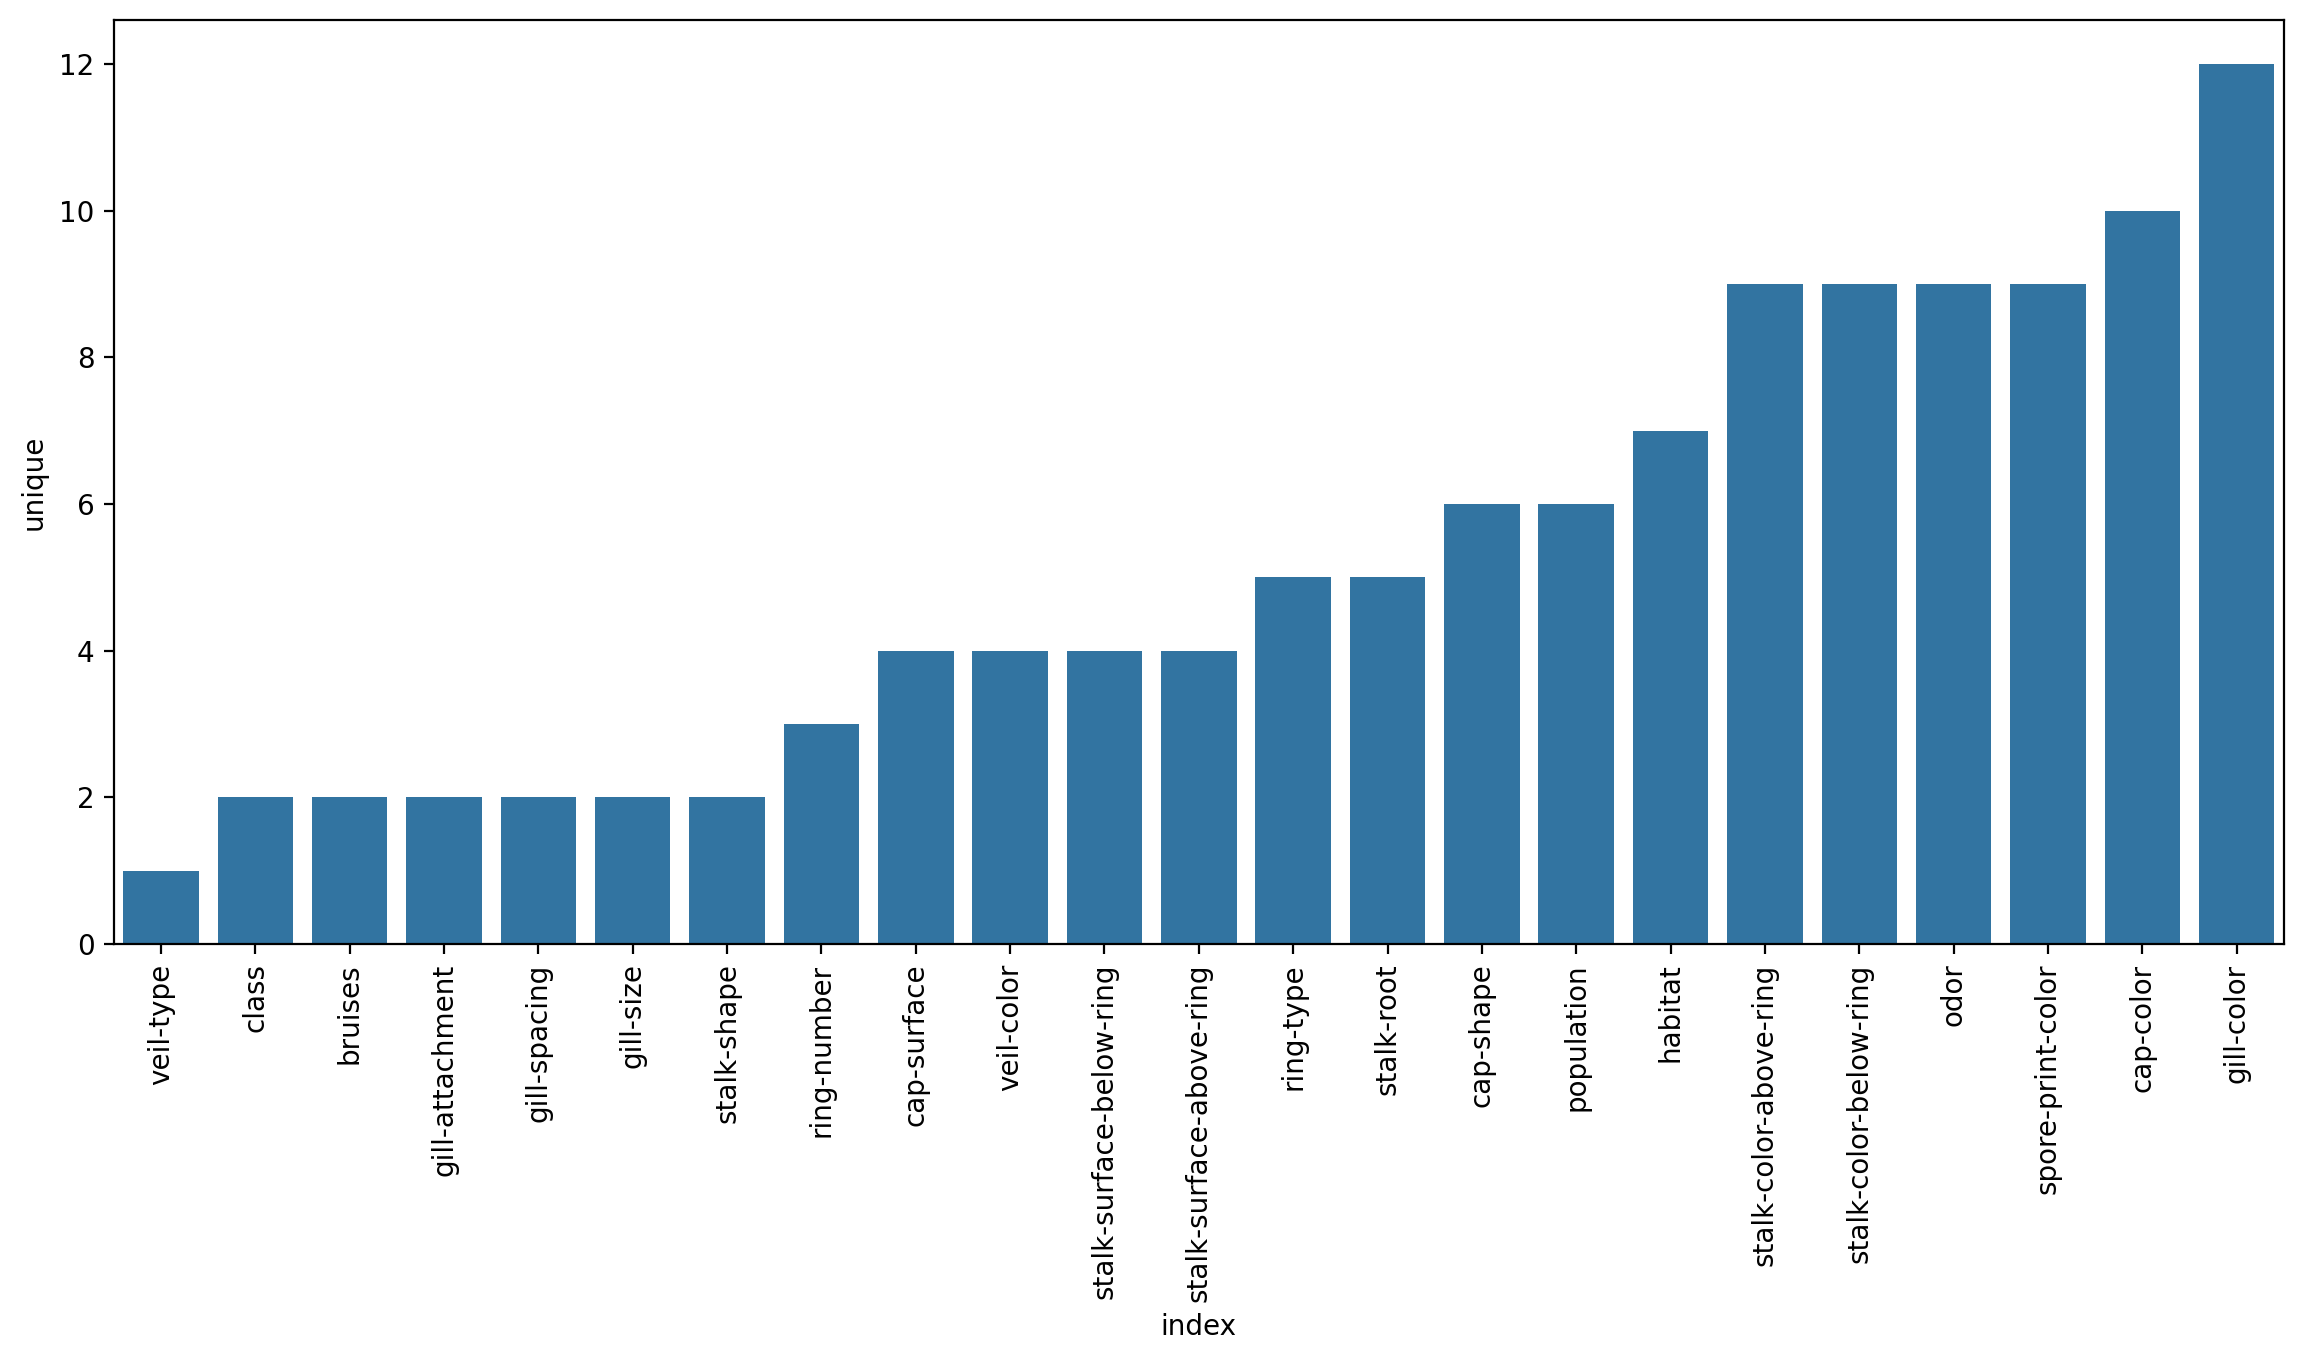

In [4]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=df.describe().transpose().reset_index().sort_values('unique'),x='index',y='unique')
plt.xticks(rotation=90);

In [5]:
df.describe().transpose()

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [7]:
X = pd.get_dummies(df.drop('class',axis=1), drop_first = True)
y = df['class']

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [9]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(n_estimators=1)

In [10]:
model.fit(X_train, y_train)

/usr/local/Caskroom/miniforge/base/envs/ml1/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(n_estimators=1)

In [12]:
from sklearn.metrics import classification_report,accuracy_score

In [14]:
predictions = model.predict(X_test)

In [15]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           e       0.96      0.81      0.88       655
           p       0.81      0.96      0.88       564

    accuracy                           0.88      1219
   macro avg       0.88      0.88      0.88      1219
weighted avg       0.89      0.88      0.88      1219



In [17]:

print(model.feature_importances_)
print(model.feature_importances_.argmax())

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
22


<Axes: xlabel='odor', ylabel='count'>

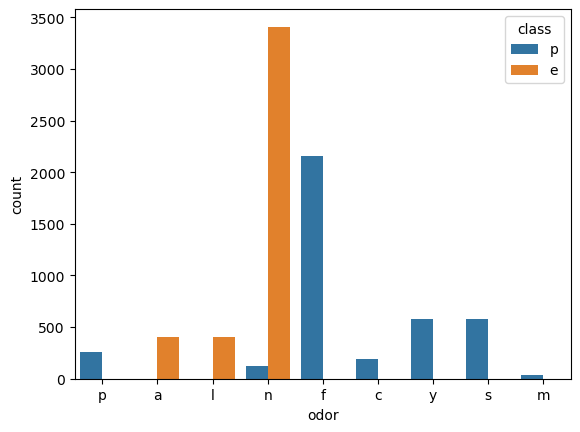

In [18]:
sns.countplot(data=df,x='odor',hue='class')

In [19]:
error_rates = []

for n in range(1,96):
    
    model = AdaBoostClassifier(n_estimators=n)
    model.fit(X_train,y_train)
    preds = model.predict(X_test)
    err = 1 - accuracy_score(y_test,preds)
    
    error_rates.append(err)

/usr/local/Caskroom/miniforge/base/envs/ml1/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/Caskroom/miniforge/base/envs/ml1/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/Caskroom/miniforge/base/envs/ml1/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/Caskroom/miniforge/base/envs/ml1/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is depr

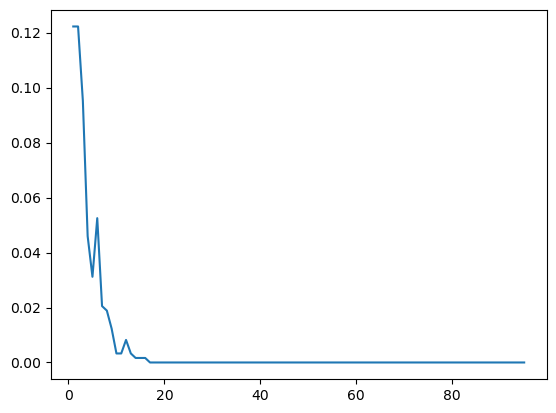

In [20]:
plt.plot(range(1,96),error_rates)

In [21]:
feats = pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Importance'])

In [22]:
imp_feats = feats[feats['Importance']>0].sort_values('Importance')
print(imp_feats)

                            Importance
cap-color_c                   0.010526
ring-number_t                 0.010526
stalk-color-below-ring_w      0.010526
stalk-root_b                  0.010526
stalk-shape_t                 0.010526
habitat_w                     0.010526
cap-color_n                   0.010526
cap-color_w                   0.010526
odor_p                        0.021053
odor_c                        0.031579
odor_f                        0.031579
stalk-surface-below-ring_y    0.031579
population_v                  0.042105
bruises_t                     0.052632
spore-print-color_r           0.052632
stalk-surface-above-ring_k    0.063158
stalk-color-below-ring_n      0.063158
odor_n                        0.063158
gill-size_n                   0.094737
gill-spacing_w                0.094737
population_c                  0.105263
spore-print-color_w           0.168421


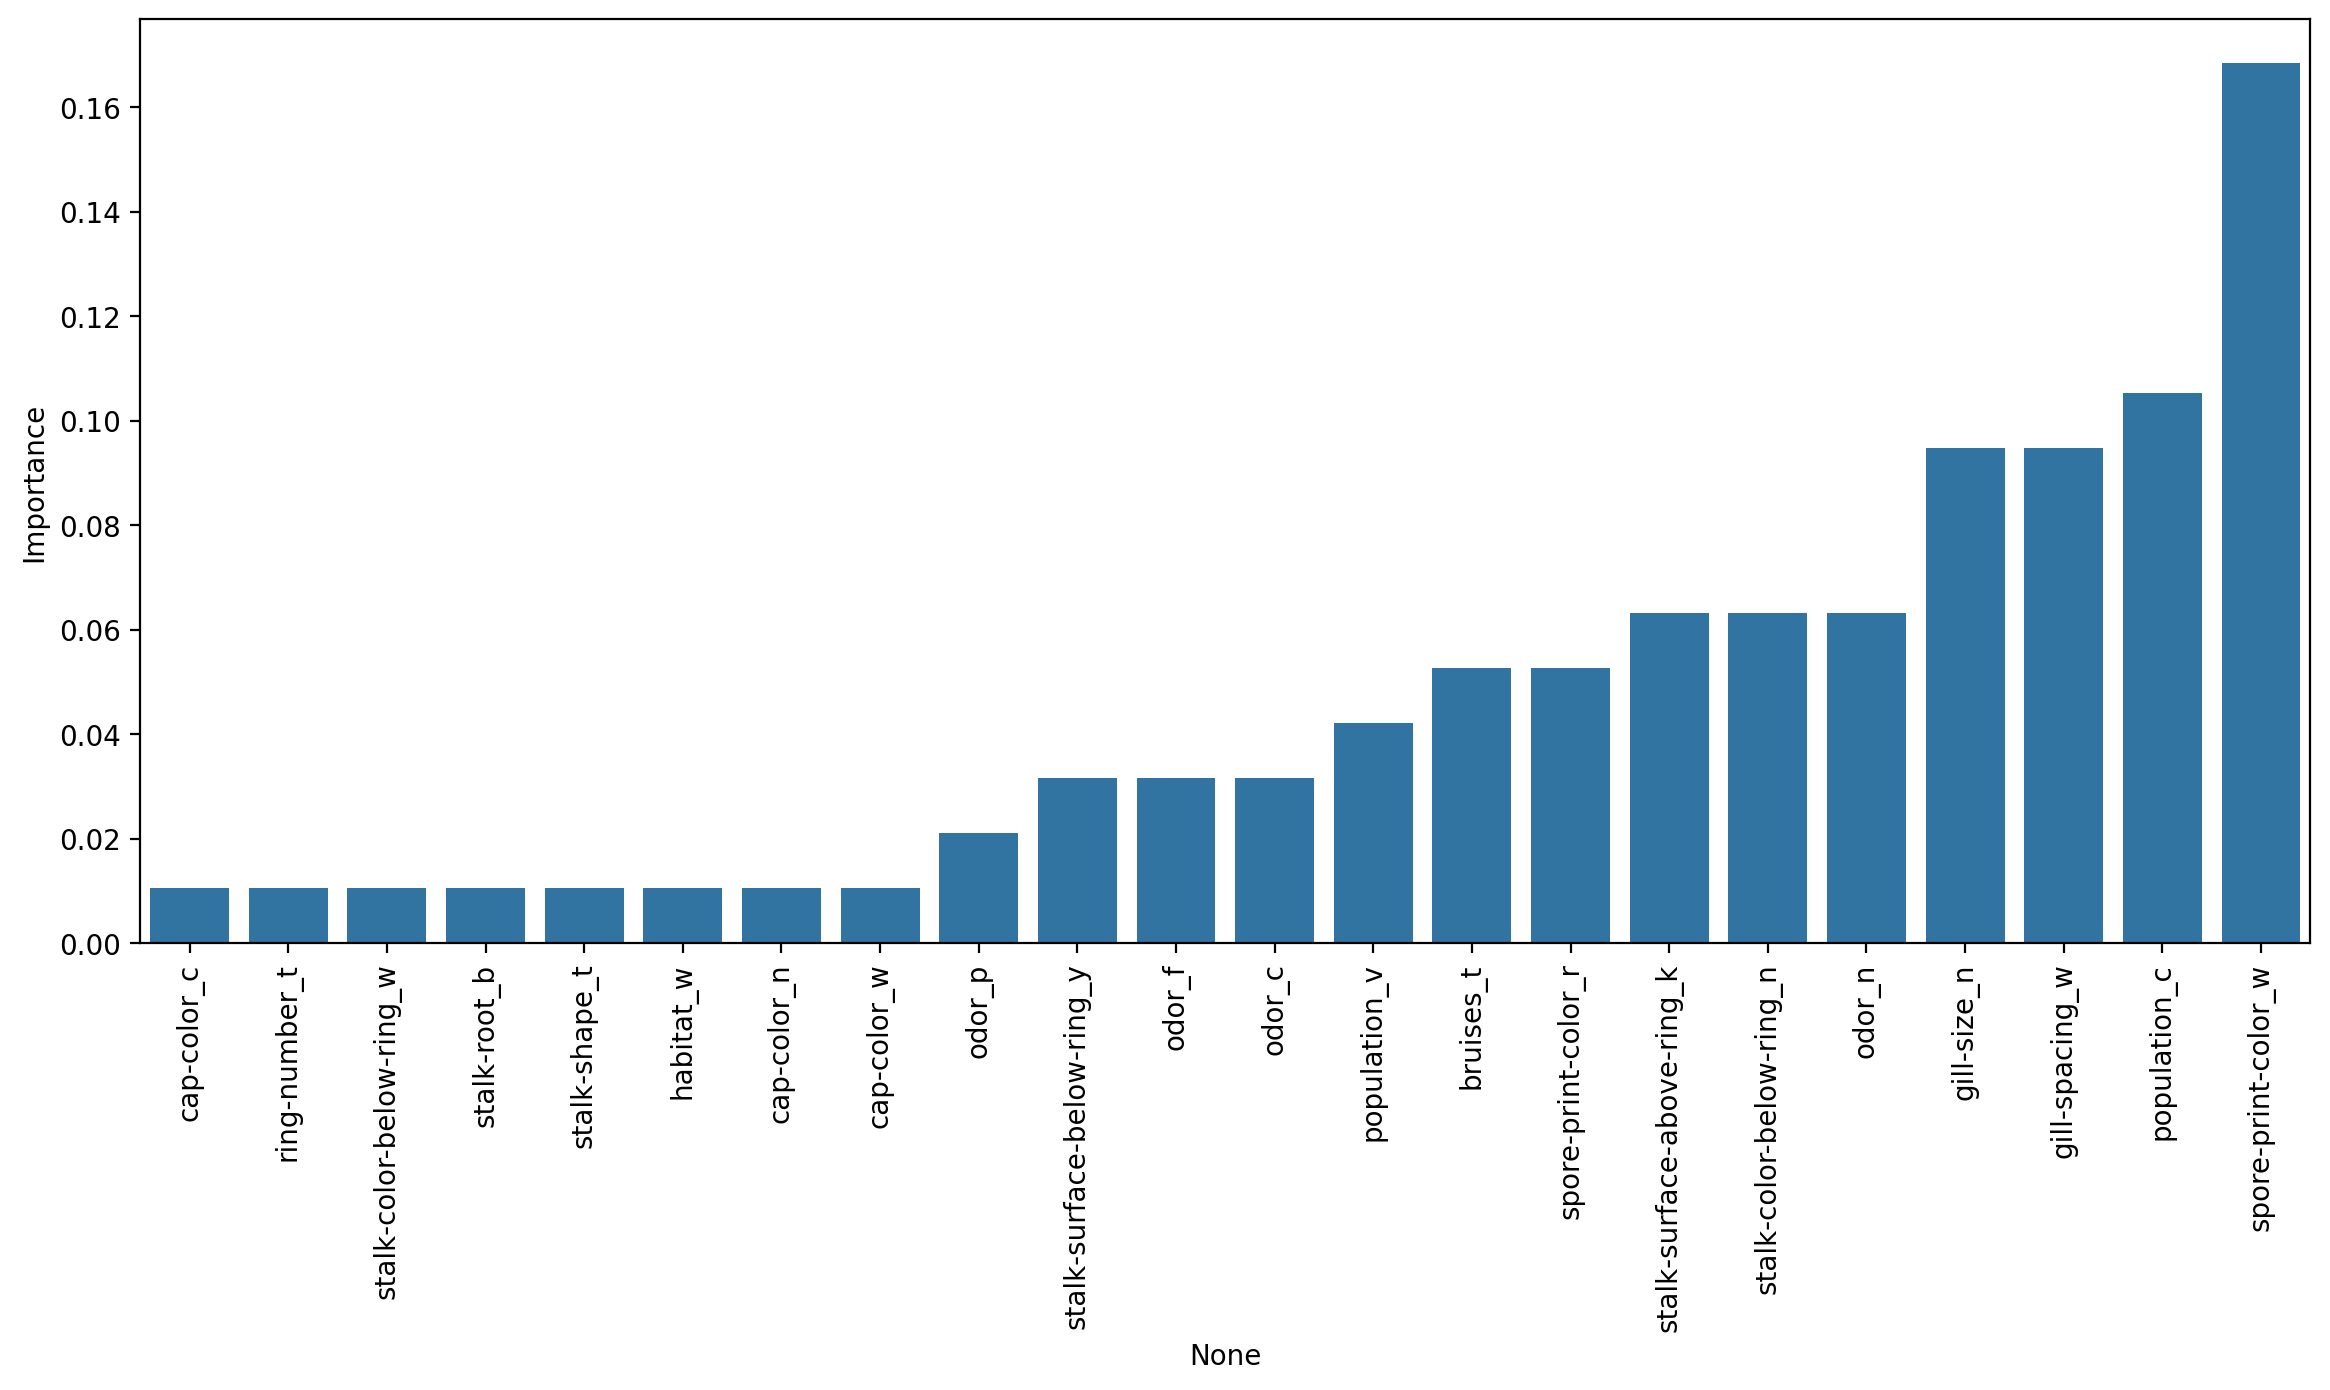

In [23]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_feats.sort_values('Importance'),x=imp_feats.sort_values('Importance').index,y='Importance')

plt.xticks(rotation=90);

In [24]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {"n_estimators":[1,5,10,20,40,100],'max_depth':[3,4,5,6]}
gb_model = GradientBoostingClassifier()
grid = GridSearchCV(gb_model,param_grid)

In [25]:
import warnings
warnings.filterwarnings('ignore')

In [26]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'n_estimators': [1, 5, 10, 20, 40, 100]})

In [27]:
grid.best_params_

{'max_depth': 3, 'n_estimators': 100}

In [28]:
grid.best_estimator_.feature_importances_

array([2.91150176e-04, 1.51538764e-16, 0.00000000e+00, 0.00000000e+00,
       2.98245206e-17, 1.04902579e-03, 7.02900299e-18, 1.27734798e-06,
       0.00000000e+00, 0.00000000e+00, 4.28118912e-17, 0.00000000e+00,
       2.46742010e-17, 0.00000000e+00, 0.00000000e+00, 3.34879058e-08,
       2.31053911e-03, 5.25928970e-02, 1.84253604e-04, 1.40361055e-02,
       1.82499853e-02, 9.54700211e-06, 6.14744334e-01, 3.94907433e-03,
       0.00000000e+00, 0.00000000e+00, 3.05153504e-17, 1.25278108e-02,
       1.11915209e-02, 0.00000000e+00, 3.35891511e-17, 0.00000000e+00,
       3.26464431e-17, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.24198488e-17, 0.00000000e+00, 2.16734166e-17, 0.00000000e+00,
       0.00000000e+00, 9.65607395e-04, 1.35970285e-01, 4.69032068e-03,
       5.17747365e-02, 4.65375385e-04, 2.54703069e-03, 4.95063766e-06,
       1.76797782e-05, 0.00000000e+00, 1.45600765e-02, 9.43968237e-05,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [30]:
feat_import = grid.best_estimator_.feature_importances_
imp_feats = pd.DataFrame(index=X.columns,data=feat_import,columns=['Importance'])

In [31]:
imp_feats.sort_values("Importance",ascending=False)

,Importance
odor_n,0.614744
stalk-root_c,0.135970
bruises_t,0.052593
stalk-root_r,0.051775
spore-print-color_r,0.030495
...,...
gill-color_e,0.000000
veil-color_o,0.000000
gill-color_y,0.000000
odor_y,0.000000


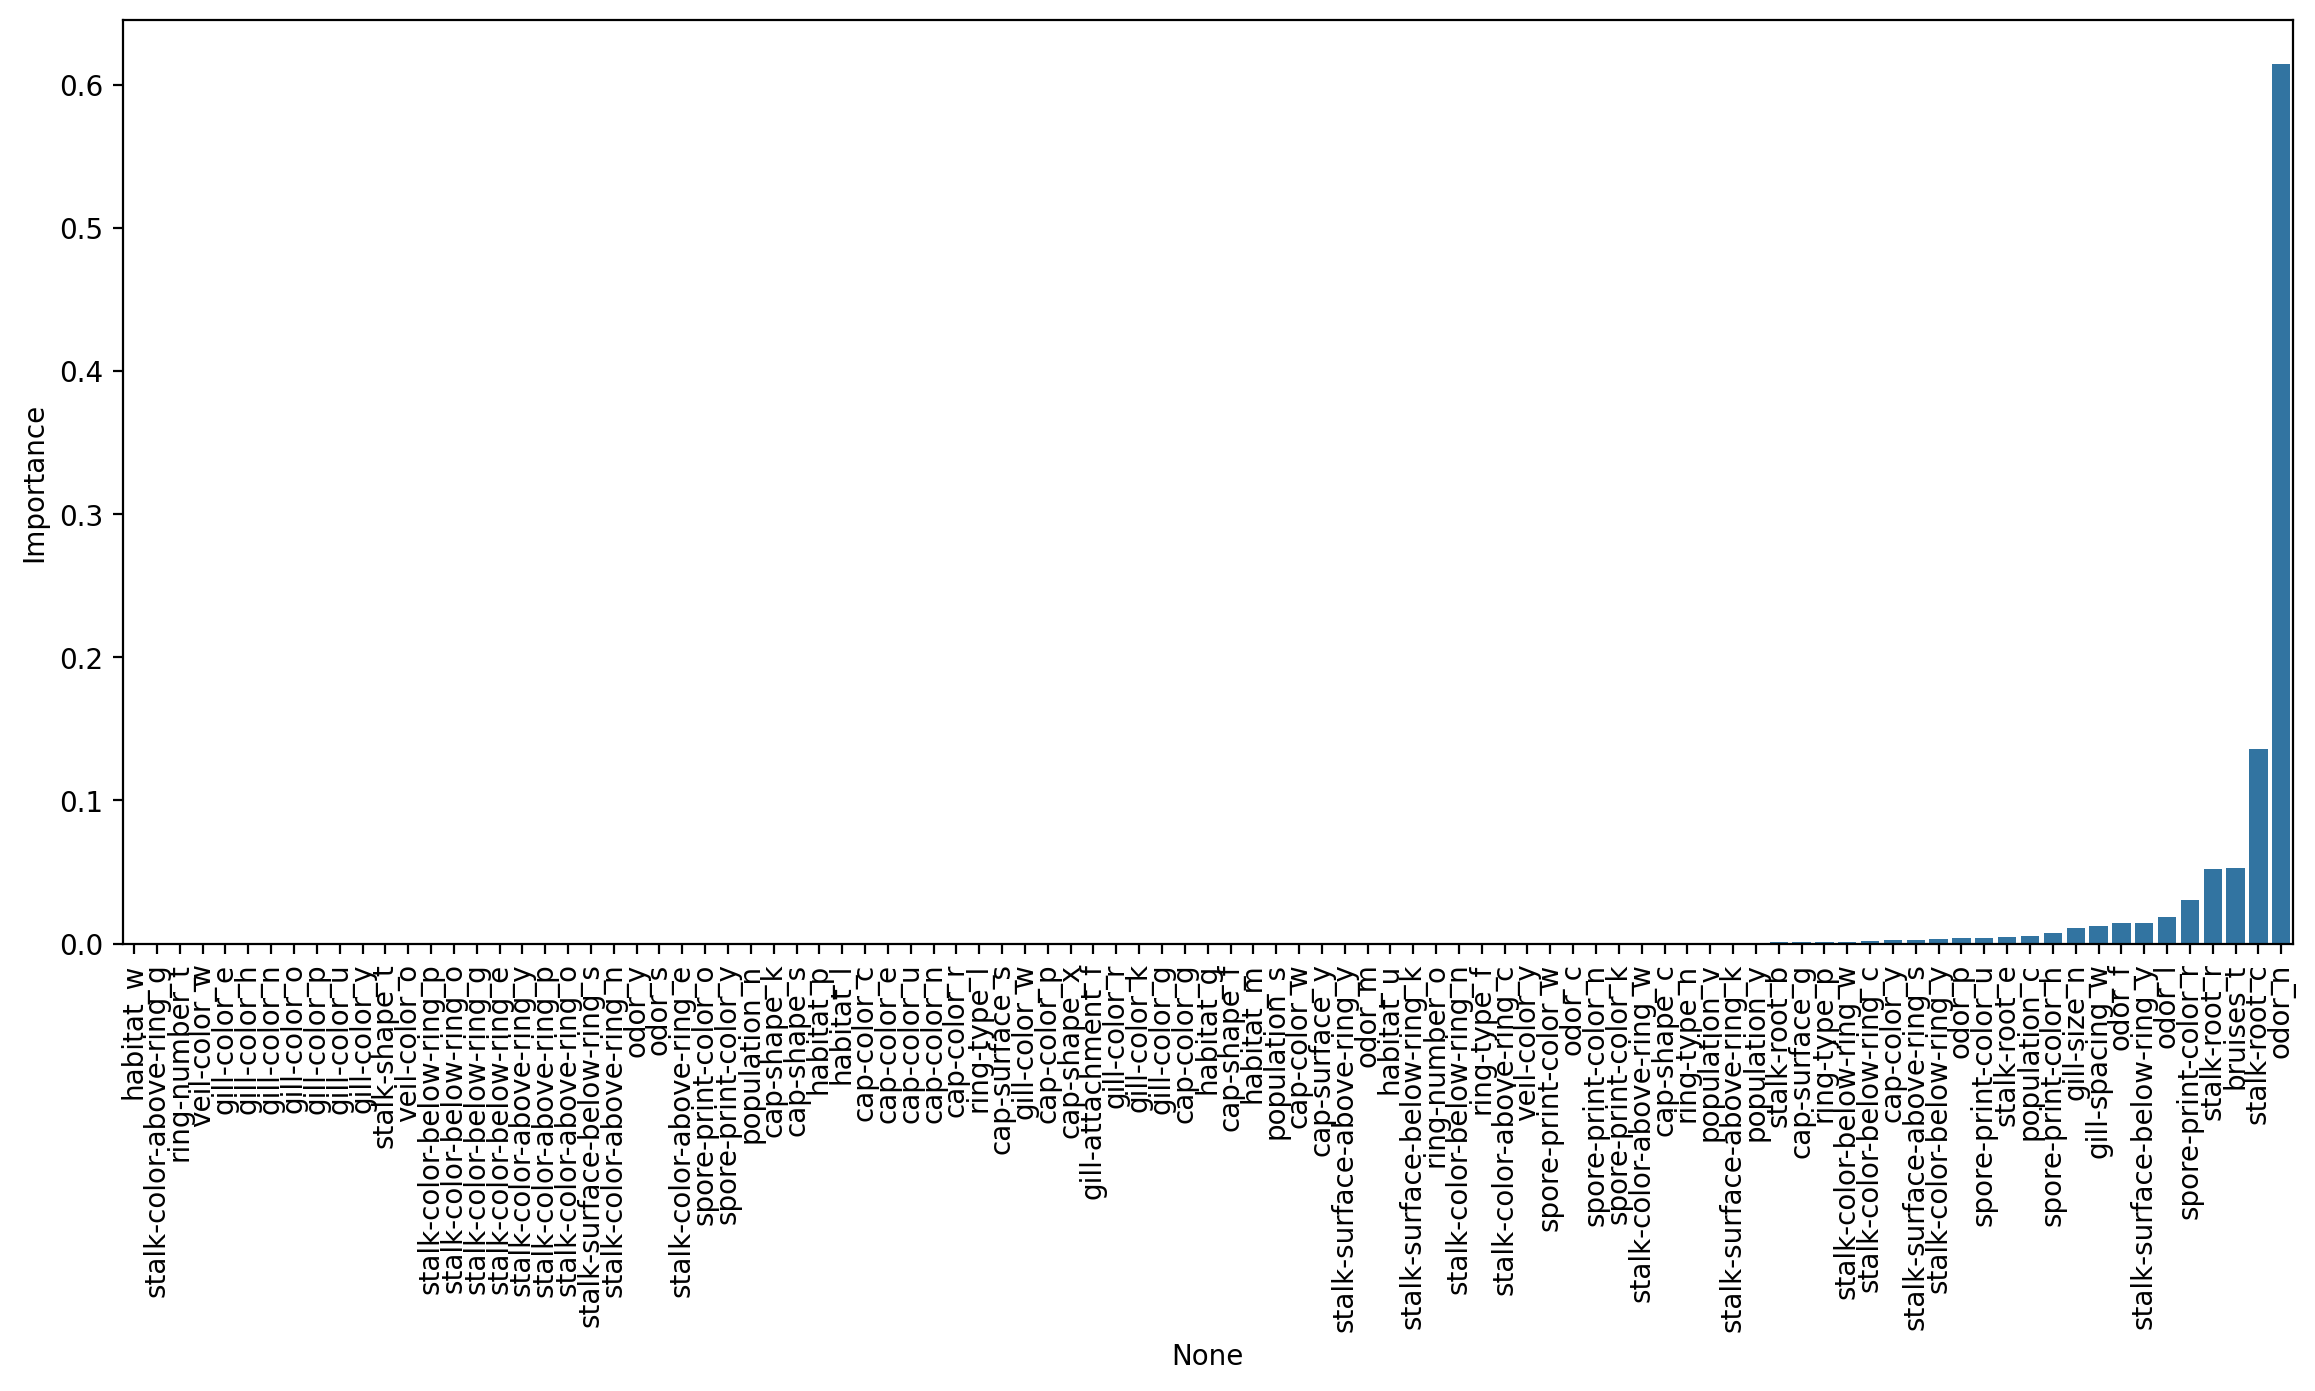

In [32]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_feats.sort_values('Importance'),x=imp_feats.sort_values('Importance').index,y='Importance')
plt.xticks(rotation=90);